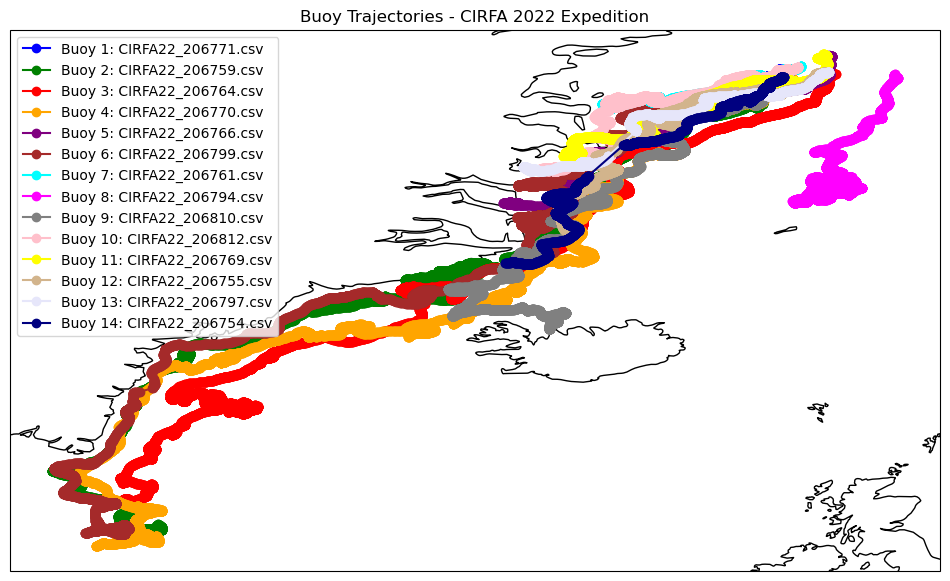

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Now define the relative path to the folder containing the CSV files
folder_path = '../../../data/buoy_data/cirfa2022/cleaned_data'

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize the plot with a map background
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Define a list of colors for each buoy trajectory
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'cyan', 'magenta', 
          'grey', 'pink', 'yellow', 'tan', 'lavender', 'navy']

# Iterate over the CSV files and plot each trajectory
for i, file in enumerate(csv_files):
    # Load each CSV file into a DataFrame
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, header=None, names=['datetime', 'latitude', 'longitude'])
    
    # Convert 'datetime' column to datetime type, infer the format
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
    
    # Clean the data by removing invalid rows and converting to numeric
    df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
    df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
    df_cleaned = df.dropna(subset=['longitude', 'latitude'])

    # Plot the trajectory using a unique color for each buoy
    ax.plot(df_cleaned['longitude'], df_cleaned['latitude'], linestyle='-', marker='o', 
            color=colors[i % len(colors)], label=f'Buoy {i + 1}: {file}')
    
# Add labels, title, and legend
plt.title('Buoy Trajectories - CIRFA 2022 Expedition')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper left')

# Show the plot
plt.show()




Z